## Stock Selection Project - Group 5
### Group Members:
Avril Childs, Bushra Abodher, Esther Nansubuga, Laura Davies, Laura Lloyd, Wei Shi.


In [172]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,roc_curve,auc
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
# Load up Stock_Screening - used cleaned data deligated to team members
df = pd.read_excel('Stock_Screening_CFG v2.xlsx', sheet_name = None)
df_y = pd.read_excel('Stock_Screening_CFG v2.xlsx', sheet_name = 'Y Label', index_col=0)
df_returns = pd.read_excel('Stock_Screening_CFG v2.xlsx', sheet_name = 'Returns', index_col=0)
df_index_returns = pd.read_excel('Stock_Screening_CFG v2.xlsx', sheet_name = 'Monthly Price-S&P500', index_col=0)
df_evebitda = pd.read_csv("ebitdamargin_data_cleaned.csv", index_col=0)
df_pe = pd.read_csv('pe_data_cleaned.csv', index_col=0)
df_peg = pd.read_csv('peg_data_cleaned.csv', index_col=0)
df_roa = pd.read_csv('roa_data_cleaned.csv', index_col=0)
df_roe = pd.read_csv('roe_data_cleaned.csv', index_col=0)
df_ebitdamargin = pd.read_csv('ebitdamargin_data_cleaned.csv', index_col=0)
df_epsgrowth = pd.read_csv('eps_data_cleaned.csv', index_col=0)
df_cfogrowth = pd.read_csv('cfogrowth_cleaned.csv', index_col=0)


In [174]:
# Convert the index of the dfs into datetime objects
df_y.index = pd.to_datetime(df_y.index)
df_returns.index = pd.to_datetime(df_returns.index)
df_index_returns.index = pd.to_datetime(df_index_returns.index)
df_evebitda.index = pd.to_datetime(df_evebitda.index)
df_pe.index = pd.to_datetime(df_pe.index)
df_peg.index = pd.to_datetime(df_peg.index)
df_roa.index = pd.to_datetime(df_roa.index)
df_roe.index = pd.to_datetime(df_roe.index)
df_ebitdamargin.index = pd.to_datetime(df_ebitdamargin.index)
df_epsgrowth.index = pd.to_datetime(df_epsgrowth.index)
df_cfogrowth.index = pd.to_datetime(df_cfogrowth.index)

In [175]:
# Renaming Columns to remove punctuation
df_y.columns = [column.split(":")[-1] for column in df_y.columns]
df_returns.columns = [column.split(":")[-1] for column in df_returns]
df_index_returns.columns = [column.split(":")[-1] for column in df_index_returns.columns]
df_evebitda.columns = [column.split(":")[-1] for column in df_evebitda.columns]
df_pe.columns = [column.split(":")[-1] for column in df_pe.columns]
df_peg.columns = [column.split(":")[-1] for column in df_peg.columns]
df_roa.columns = [column.split(":")[-1] for column in df_roa.columns]
df_roe.columns = [column.split(":")[-1] for column in df_roe.columns]
df_ebitdamargin.columns = [column.split(":")[-1] for column in df_ebitdamargin.columns]
df_epsgrowth.columns = [column.split(":")[-1] for column in df_epsgrowth.columns]
df_cfogrowth.columns = [column.split(":")[-1] for column in df_cfogrowth.columns]

## Data Analysis

### Data Analysis - 'Returns'

In [176]:
# Have a brief understanding of the 'Returns' data
df_returns.describe()

,MSFT,AAPL,NVDA,AMZN,GOOGL,META,BRK.B,AVGO,TSLA,LLY,...,IVZ,DVA,AAL,MHK,BEN,RL,BIO,PARA,FOX,NWS
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,...,131.000000,131.000000,127.000000,131.000000,131.000000,131.000000,131.000000,131.000000,64.000000,131.000000
mean,0.021604,0.022752,0.053252,0.023641,0.018621,0.023618,0.011639,0.032124,0.037651,0.023911,...,0.000456,0.010690,0.000376,0.005564,-0.001653,0.005023,0.010801,-0.003028,0.002159,0.008211
std,0.060584,0.078717,0.130683,0.089220,0.067877,0.097415,0.048961,0.084224,0.176909,0.067617,...,0.101930,0.084632,0.119709,0.096170,0.083581,0.100160,0.083022,0.126075,0.074816,0.088854
min,-0.130248,-0.184045,-0.320274,-0.237525,-0.179467,-0.326342,-0.135958,-0.209673,-0.367334,-0.118633,...,-0.369444,-0.221011,-0.360105,-0.370697,-0.232996,-0.366600,-0.232027,-0.430719,-0.248604,-0.277331
25%,-0.013309,-0.032720,-0.025713,-0.039675,-0.021416,-0.036099,-0.022143,-0.017529,-0.077159,-0.016591,...,-0.062358,-0.024317,-0.081160,-0.049627,-0.059773,-0.058565,-0.035505,-0.065868,-0.044066,-0.047666
50%,0.018564,0.027983,0.054915,0.023475,0.018753,0.017903,0.012676,0.026974,0.008507,0.018957,...,-0.002067,0.006954,-0.002088,0.016660,-0.000461,-0.003675,0.014474,0.007542,0.000867,0.000000
75%,0.058338,0.079280,0.131506,0.081196,0.062306,0.081022,0.044446,0.079637,0.126376,0.060824,...,0.065501,0.053875,0.079808,0.066003,0.049322,0.065743,0.062053,0.054283,0.056388,0.051922
max,0.196409,0.214380,0.383988,0.270596,0.217502,0.271569,0.133779,0.289641,0.741452,0.231758,...,0.350063,0.313738,0.328713,0.219401,0.201210,0.294077,0.255420,0.372038,0.125978,0.367896


In [177]:
df_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131 entries, 2024-07-20 to 2013-09-30
Columns: 496 entries, MSFT to NWS
dtypes: float64(496)
memory usage: 508.6 KB


In [178]:
# Check the min and max in the 'Returns' dataset
stacked = df_returns.stack()
min_value = stacked.min()
min_location = stacked.idxmin()
max_value = stacked.max()
max_location = stacked.idxmax()
print(f"Lowest return: {min_value:.4f} — Company: {min_location[1]}, Date: {min_location[0].strftime('%Y-%m-%d')}")
print(f"Highest return: {max_value:.4f} — Company: {max_location[1]}, Date: {max_location[0].strftime('%Y-%m-%d')}")


Lowest return: -0.8323 — Company: APA, Date: 2020-03-31
Highest return: 2.1292 — Company: APA, Date: 2020-04-30


Data Exploration suggested APA's share price experienced extreme volatility, tried to look for the causes:

In March 2020, APA Corporation (formerly known as Apache Corporation) experienced a significant stock price decline of approximately 85%, followed by a rebound of around 200% in April 2020. This extreme volatility can be attributed to several key factors: 1) COVID-19 and Market Crash 2) Russia-Saudi Arabic Oil Price War 3) Company-Specific Challenges that APA Corporation declared its 'Alpine High' discovery a failure after investing around $3 billion in the project. This announcement likely contributed to the decline in investor confidence and further pressured the company's stock price.

This recovery can be attributed to a partial rebound in oil prices as markets adjusted to the new production levels and demand forecasts. Additionally, broader market recoveries and government stimulus measures aimed at mitigating the economic impact of the pandemic likely contributed to the rebound.

In [179]:
# Check for missing values
df_returns.isnull().sum()

MSFT      0
AAPL      0
NVDA      0
AMZN      0
GOOGL     0
         ..
RL        0
BIO       0
PARA      0
FOX      67
NWS       0
Length: 496, dtype: int64

Now we have had an overview of the 'Returns' database. We would like to find out how an equally weighted return of the 496 companies plots against the S&P 500 index.

In [180]:
# Calculate the S&P 500 index monthly returns and sanity check the returns
df_index_returns = df_index_returns.sort_index()
index_returns = df_index_returns.iloc[:, 0]
sp500_return = index_returns.pct_change()
sp500_return.tail()


Date
2024-03-31    0.031020
2024-04-30   -0.041616
2024-05-31    0.048020
2024-06-30    0.034671
2024-07-20    0.008153
Name: S&P500 Index, dtype: float64

In [181]:
# Calculate returns for an equal-weighted portfolio 
equal_weight_return = df_returns.mean(axis=1)

# Drop NaNs in both to align
combined = pd.concat([equal_weight_return, sp500_return], axis=1)
combined.columns = ['Equal_Weight', 'SP500']
combined = combined.dropna()

# Compute cumulative returns
cum_returns = (1 + combined).cumprod()
cum_returns

,Equal_Weight,SP500
Date,,
2013-09-30,1.045833,1.029747
2013-10-31,1.089201,1.075674
2013-11-30,1.113877,1.105845
2013-12-31,1.143961,1.131898
2014-01-31,1.126816,1.091622
...,...,...
2024-03-31,4.135981,3.217665
2024-04-30,3.929244,3.083760
2024-05-31,4.037577,3.231844


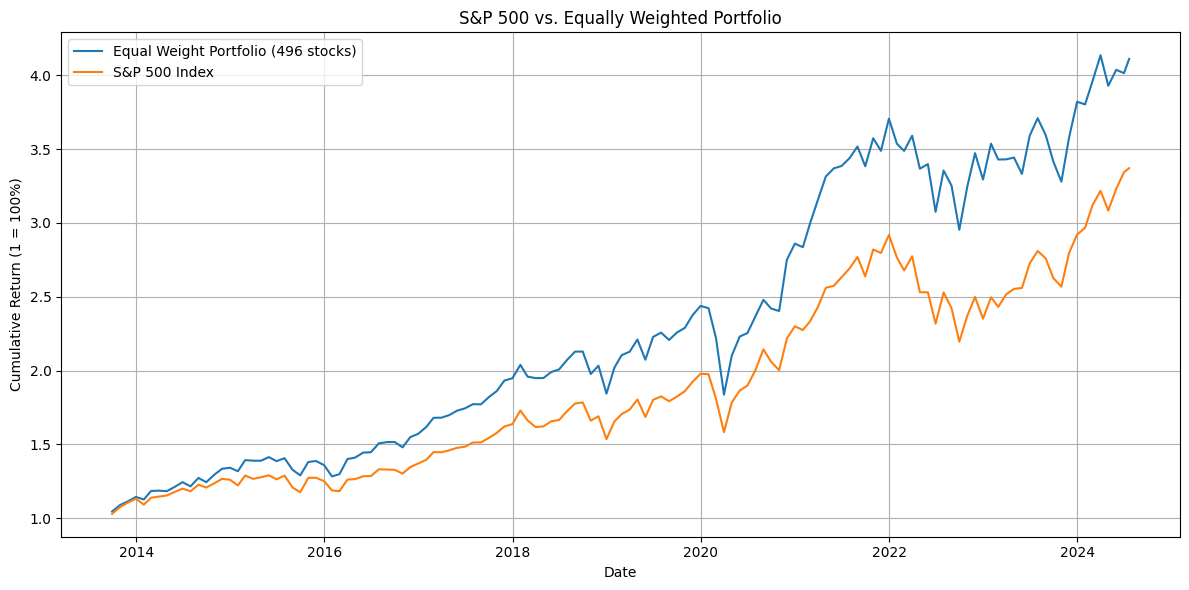

In [182]:
# Plot the return of the equally weighted portfolio against that of S&P 500 index
plt.figure(figsize=(12, 6))
plt.plot(cum_returns.index, cum_returns['Equal_Weight'], label='Equal Weight Portfolio (496 stocks)')
plt.plot(cum_returns.index, cum_returns['SP500'], label='S&P 500 Index')
plt.title('S&P 500 vs. Equally Weighted Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (1 = 100%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

From the plot above we can see that the returns of the Equally weighted portfolio outperformed those of the S&P 500 index.
We understand that in the S&P 500 index, the Magnificent Seven stocks (Apple, Microsoft, Nvidia, Amazon, Alphabet, Meta Platforms and Tesla) hold around 33% of the index's weight.

Apple: 7.04%
Nvidia: 6.40%
Microsoft: 5.88%
Amazon: 4.16%
Alphabet: 3.82%
Meta Platforms: 3.06%
Tesla: 1.92%

The concentration in the Magnificent Seven doesn't improve the returns, rather, an equally weighted portfolio benefits from diversification. 

## Data Wrangling and Preprocessing

In [183]:
# One hot encoding of the Target Variable, which is a categorical variable
df_y_binary = df_y.replace({'Outperform':1,'Underperform': 0})

# Count the occurrences of 0 and 1 in the flattened target dataframe
target_counts = df_y_binary.stack().value_counts(dropna=False)
print(target_counts)

0.0    50468
1.0     4469
Name: count, dtype: int64


C:\Users\weish\AppData\Local\Temp\ipykernel_14916\3300480101.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_y_binary = df_y.replace({'Outperform':1,'Underperform': 0})


In [184]:
# Check missing values in the Target Variable
df_y_binary.isnull().sum()

MSFT      0
AAPL      0
NVDA      0
AMZN      0
GOOGL     0
         ..
RL        0
BIO       0
PARA      0
FOX      73
NWS       0
Length: 496, dtype: int64

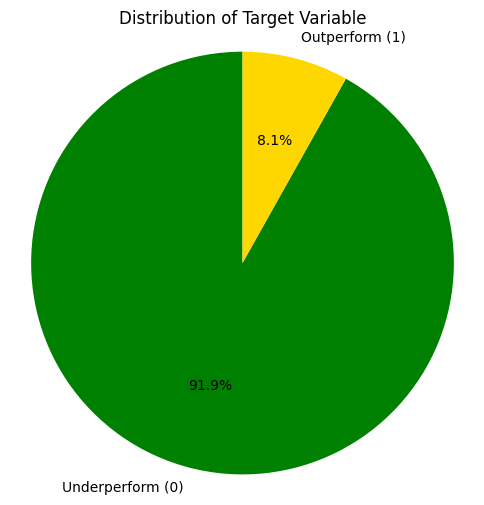

In [185]:
# Since we have data points which are not 0 or 1, we force the pie chart to only include 0 and 1
target_counts = target_counts.loc[[0, 1]]
# Plot a pie chart
plt.figure(figsize=(6,6))
plt.pie(
    target_counts,
    labels=['Underperform (0)', 'Outperform (1)'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['green', 'gold']
)
plt.title('Distribution of Target Variable')
plt.axis('equal')
plt.show()

The dataset is imbalanced, with over 90% of samples belonging to class 0 and only around 8% to class 1. To address this during model training, we use the parameter class_weight='balanced'. This instructs the model to automatically assign weights to each class inversely proportional to their frequency, so that the minority class receives higher importance and the model does not become biased toward the majority class.

Data cleansing for the features including 1) converting all entries to numeric values; 2) replacing errors with NaN; 3) converting the final result to float; 4) drop columns where the ratio of 0s are higher than 50%

In [186]:
# Function to only keep columns where the ratio of 0s is less than 50%
def drop_cols_with_many_zeros(df, threshold=0.5):
    # Calculate the percentage of 0s in each column
    zero_ratio = (df == 0).sum() / len(df)
    # Keep only columns where the ratio of 0s is less than the threshold
    return df.loc[:, zero_ratio < threshold]

In [187]:
# Data cleaning, making sure all the entries are numeric, errors are addressed and final result is float
def clean_feature(df):
    df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).astype(float)
    df = drop_cols_with_many_zeros(df)
    return df

df_evebitda = clean_feature(df_evebitda)
df_pe = clean_feature(df_pe)
df_peg = clean_feature(df_peg)
df_roa = clean_feature(df_roa)
df_roe = clean_feature(df_roe)
df_ebitdamargin = clean_feature(df_ebitdamargin)
df_epsgrowth = clean_feature(df_epsgrowth)
df_cfogrowth = clean_feature(df_cfogrowth)
df_returns = clean_feature(df_returns)

C:\Users\weish\AppData\Local\Temp\ipykernel_14916\2486778420.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).astype(float)
C:\Users\weish\AppData\Local\Temp\ipykernel_14916\2486778420.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).astype(float)
C:\Users\weish\AppData\Local\Temp\ipykernel_14916\2486778420.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).astype(float)
C:\Users\weish\AppData\Local\Temp\ipykernel_14916\2486778420.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).astype(float)
C:\Users\weish\AppData\Local\Temp\ipykernel_14916\2486778420.py:3: FutureWarning: DataFrame.

Heatmap to show the correlation matrix between each one of the features and return

In [188]:
# Flatten each feature
evebitda_flat = df_evebitda.stack()
pe_flat = df_pe.stack()
peg_flat = df_peg.stack()
roa_flat = df_roa.stack()
roe_flat = df_roe.stack()
ebitdamargin_flat = df_ebitdamargin.stack()
epsgrowth_flat = df_epsgrowth.stack()
cfogrowth_flat = df_cfogrowth.stack()
returns_flat = df_returns.stack()


In [189]:
# Combine into one DataFrame
data_flat = pd.DataFrame({
    'EV_EBITDA': evebitda_flat,
    'PE': pe_flat,
    'PEG': peg_flat,
    'ROA': roa_flat,
    'ROE': roe_flat,
    'EBITDA_Margin': ebitdamargin_flat,
    'EPS_Growth': epsgrowth_flat,
    'CFO_Growth': cfogrowth_flat,
    'Returns': returns_flat
}).dropna()

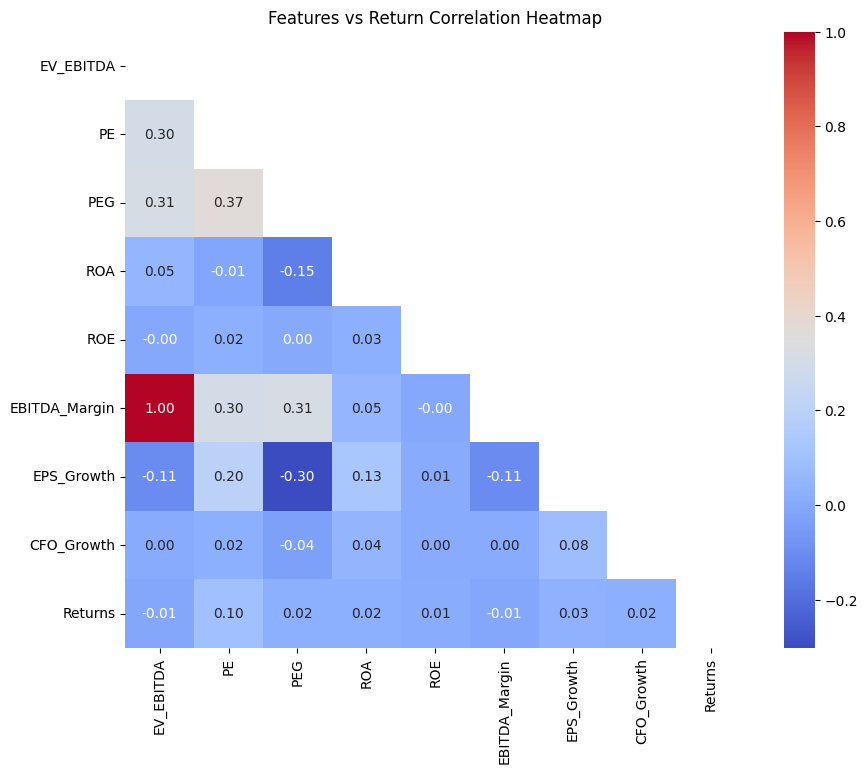

In [190]:
# Compute correlation matrix
corr_matrix = data_flat.corr()

# Plot
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # hide upper triangle
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', fmt=".2f")
plt.title("Features vs Return Correlation Heatmap")
plt.show()

The correlations between features and returns are low.

In [191]:
# Reshape the data from wide format (dates as index, tickers as columns) to long format (rows: date, ticker, value) to prepare for Symbolic artificial intelligence (SAI)
# Define feature DataFrames
feature_dfs = {
    "PE": df_pe,
    "EV_EBITDA": df_evebitda,
    "PEG": df_peg,
    "ROA": df_roa,
    "ROE": df_roe,
    "EBITDA_margin": df_ebitdamargin,
    "EPS_growth": df_epsgrowth,
    "CFO_growth": df_cfogrowth
}

# Melt all into long format
long_features = []

for name, df_feat in feature_dfs.items():
    df_feat.index.name = "date"
    df_feat = df_feat.copy() 
    
    if name in df_feat.columns:
        df_feat = df_feat.drop(columns=[name])
    
    melted = df_feat.reset_index().melt(id_vars="date", var_name="ticker", value_name=name)
    long_features.append(melted)



In [192]:
from functools import reduce

# Merge all features into one long dataframe
# Merge on date and ticker
df_merged = reduce(lambda left, right: pd.merge(left, right, on=["date", "ticker"], how="outer"), long_features)


In [193]:
# Make sure the index is named
df_y.index.name = "date"

# Melt the label DataFrame into long format
df_y_long = df_y.reset_index().melt(id_vars="date", var_name="ticker", value_name="label")



In [194]:
# Inner join to keep only rows with both features and label
final_df = pd.merge(df_merged, df_y_long, on=["date", "ticker"], how="inner")


In [195]:
# Drop rows with any missing data
final_df = final_df.dropna()

# Convert label to binary
final_df["label"] = final_df["label"].map({"Underperform": 0, "Outperform": 1})

# Make sure date is datetime
final_df["date"] = pd.to_datetime(final_df["date"])


In [196]:
final_df

,date,ticker,PE,EV_EBITDA,PEG,ROA,ROE,EBITDA_margin,EPS_growth,CFO_growth,label
0,2015-01-31,A,21.93966,20.5115,2.01630,3.3287,4.2118,20.5115,10.88117,18.7102,0
2,2015-01-31,AAPL,13.62579,33.8653,0.93475,15.2147,35.1461,33.8653,14.57693,33.7459,1
3,2015-01-31,ABBV,13.60092,31.4929,1.00007,12.1228,56.9136,31.4929,13.60000,-20.9327,0
5,2015-01-31,ABT,20.84109,21.7167,1.89338,4.2894,7.3380,21.7167,11.00734,10.5595,1
6,2015-01-31,ACGL,15.18772,20.7119,1.81346,2.4239,12.8662,20.7119,8.37500,21.8908,0
...,...,...,...,...,...,...,...,...,...,...,...
56685,2024-07-20,WTW,15.72268,26.0892,1.26701,4.0189,11.3829,26.0892,12.40932,36.7886,0
56688,2024-07-20,XEL,15.60260,39.7939,2.45386,2.6517,10.6401,39.7939,6.35839,16.2082,0
56690,2024-07-20,XYL,31.91356,19.3187,2.35553,4.1546,7.5525,19.3187,13.54833,57.4175,0
56692,2024-07-20,ZBH,13.45870,33.6075,1.60958,4.5682,7.9464,33.6075,8.36164,12.7943,0


## Train-Test Split

In [197]:
# Sort the DataFrame by date
final_df = final_df.sort_values(by="date")

# Decide cutoff date for train-test split
cutoff_date = "2022-01-01" 

# Train/Test split based on date
train_df = final_df[final_df["date"] < cutoff_date]
test_df  = final_df[final_df["date"] >= cutoff_date]



In [198]:
# Separate the features and labels

X_train = train_df[['PE', 'EV_EBITDA', 'PEG', 'ROA', 'ROE', 'EBITDA_margin', 'EPS_growth', 'CFO_growth']]
y_train = train_df['label']

X_test = test_df[['PE', 'EV_EBITDA', 'PEG', 'ROA', 'ROE', 'EBITDA_margin', 'EPS_growth', 'CFO_growth']]
y_test = test_df['label']


In [199]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [201]:
# Get the model evaluation function ready to be used in the next session
def evaluate_model(model, X_train, y_train, X_test, y_test, title):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {title}:")
    print(cm)
    print(classification_report(y_test, y_pred))
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## Run Three Models - Logistic Regression, Random Forest and Neutral Networks

Confusion Matrix for Logistic Regression:
[[6766 2826]
 [ 198  254]]
              precision    recall  f1-score   support

           0       0.97      0.71      0.82      9592
           1       0.08      0.56      0.14       452

    accuracy                           0.70     10044
   macro avg       0.53      0.63      0.48     10044
weighted avg       0.93      0.70      0.79     10044



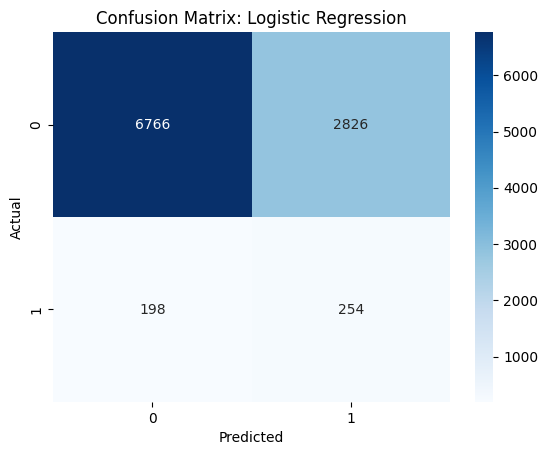

Confusion Matrix for Random Forest:
[[9488  104]
 [ 377   75]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      9592
           1       0.42      0.17      0.24       452

    accuracy                           0.95     10044
   macro avg       0.69      0.58      0.61     10044
weighted avg       0.94      0.95      0.94     10044



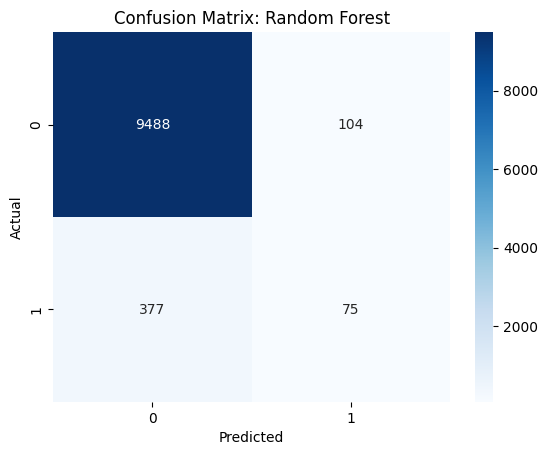

Confusion Matrix for Neural Network:
[[9239  353]
 [ 389   63]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      9592
           1       0.15      0.14      0.15       452

    accuracy                           0.93     10044
   macro avg       0.56      0.55      0.55     10044
weighted avg       0.92      0.93      0.92     10044



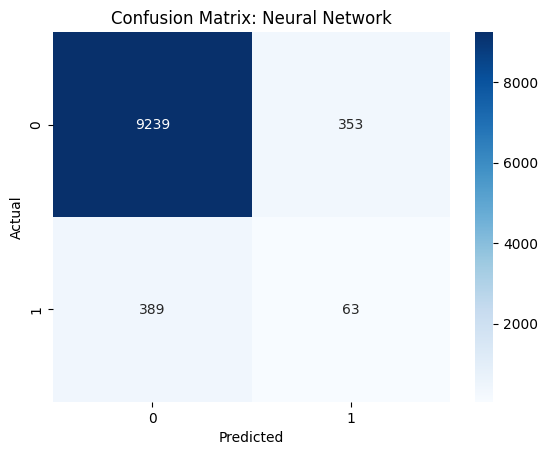

In [202]:
# Logistic Regression
logit = LogisticRegression(class_weight='balanced', max_iter=1000)
evaluate_model(logit, X_train_scaled, y_train, X_test_scaled, y_test, 'Logistic Regression')

# Random Forest
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
evaluate_model(rf, X_train_scaled, y_train, X_test_scaled, y_test, 'Random Forest')

# Neural Network
nn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
evaluate_model(nn, X_train_scaled, y_train, X_test_scaled, y_test, 'Neural Network')

Interpretation of the Confusion Matrix:

Precision (1) - Of all predicted 'Outperform', how many were actually correct (low = lots of false positives)

Recall (1) - Of all actual 'Outperform', how many did we catch (low = we missed a lot)

F1 - Harmonic mean of precision and recall. Balances the two

Accuracy - Overall correct predictions, not meaningful in imbalanced data

Macro avg - Average across both classes, treating them equally, good for imbalance

Weighted avg - Like macro, but accounts for class size, can be misleading with imbalance

## Use Grid Search for the hyperparameter tuning

In [203]:
# Import GridSearchCV for the hyperparameter tuning
from sklearn.model_selection import GridSearchCV

## Logistic Regression 

Best Logistic Regression Params: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Confusion Matrix for Tuned Logistic Regression:
[[6777 2815]
 [ 198  254]]
              precision    recall  f1-score   support

           0       0.97      0.71      0.82      9592
           1       0.08      0.56      0.14       452

    accuracy                           0.70     10044
   macro avg       0.53      0.63      0.48     10044
weighted avg       0.93      0.70      0.79     10044



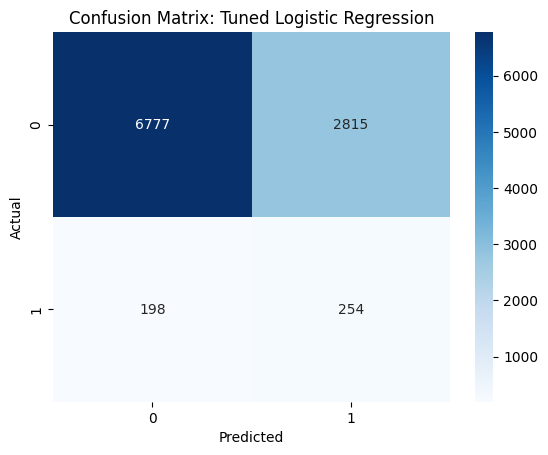

In [204]:
param_grid_logit = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2'],
    'class_weight': ['balanced']
}

grid_logit = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_logit, cv=5, scoring='f1', n_jobs=-1)
grid_logit.fit(X_train_scaled, y_train)

print("Best Logistic Regression Params:", grid_logit.best_params_)
evaluate_model(grid_logit.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test, "Tuned Logistic Regression")


## Random Forest

Best Random Forest Params: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Confusion Matrix for Tuned Random Forest:
[[8117 1475]
 [ 243  209]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      9592
           1       0.12      0.46      0.20       452

    accuracy                           0.83     10044
   macro avg       0.55      0.65      0.55     10044
weighted avg       0.93      0.83      0.87     10044



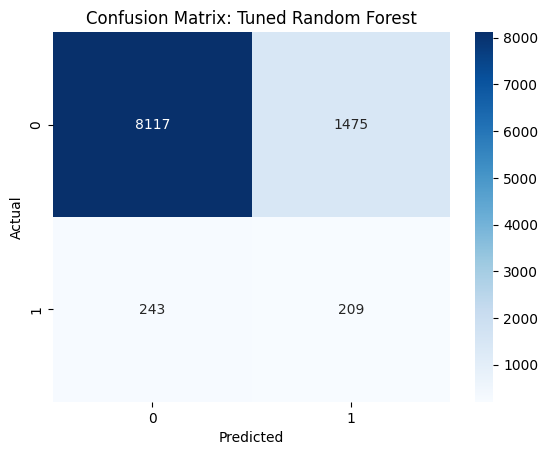

In [205]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

print("Best Random Forest Params:", grid_rf.best_params_)
evaluate_model(grid_rf.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test, "Tuned Random Forest")


## Neutral Networks

Best Neural Network Params: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (128, 64), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}
Confusion Matrix for Tuned Neural Network:
[[8855  737]
 [ 335  117]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      9592
           1       0.14      0.26      0.18       452

    accuracy                           0.89     10044
   macro avg       0.55      0.59      0.56     10044
weighted avg       0.93      0.89      0.91     10044



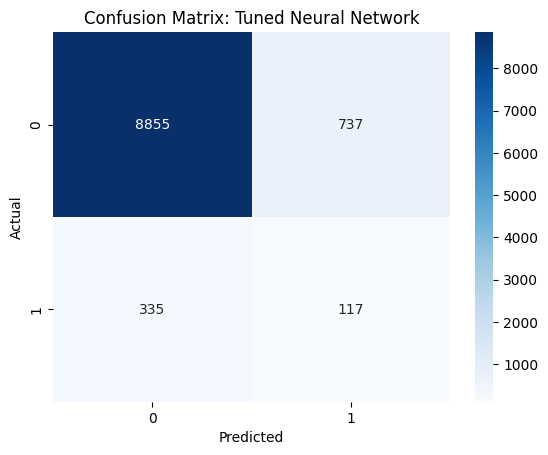

In [206]:
param_grid_nn = {
    'hidden_layer_sizes': [(64,), (64, 32), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [1000]
}

grid_nn = GridSearchCV(MLPClassifier(random_state=42), param_grid_nn, cv=3, scoring='f1', n_jobs=-1)
grid_nn.fit(X_train_scaled, y_train)

print("Best Neural Network Params:", grid_nn.best_params_)
evaluate_model(grid_nn.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test, "Tuned Neural Network")


In [207]:
# Assuming logit, random forest, and neural net models are already trained
# Logistic Regression
logit_model = LogisticRegression(max_iter=1000, random_state=42)
logit_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Neural Network
nn_model = MLPClassifier(max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)


MLPClassifier(max_iter=1000, random_state=42)

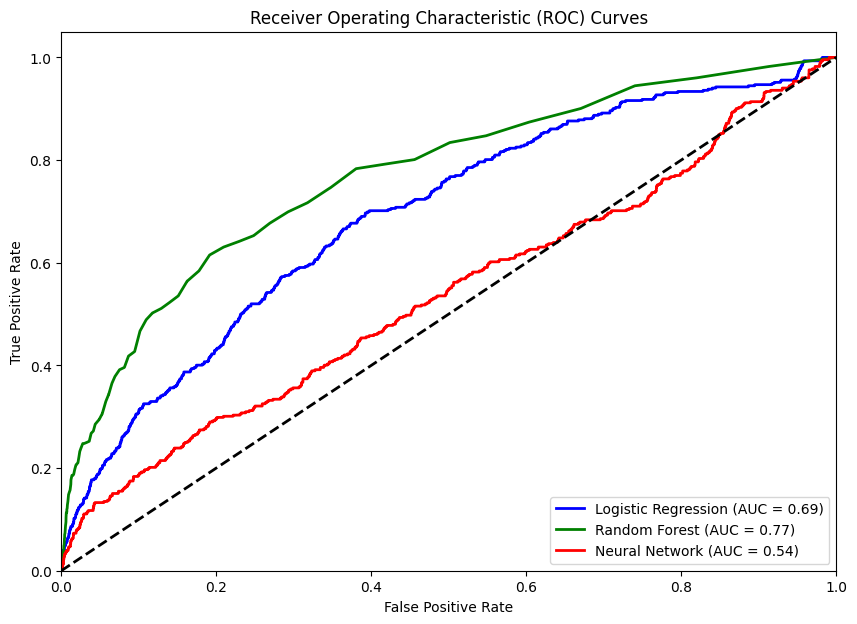

In [208]:
# Get the probabilities for ROC curve calculation (not the class predictions)
logit_probs = logit_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]
nn_probs = nn_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for each model
fpr_logit, tpr_logit, _ = roc_curve(y_test, logit_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_probs)

# Compute the AUC for each model
roc_auc_logit = auc(fpr_logit, tpr_logit)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot the ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_logit, tpr_logit, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logit:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_nn, tpr_nn, color='red', lw=2, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


In [209]:
import joblib

rf_model.fit(X_train, y_train)
joblib.dump(X_train.columns.tolist(), "rf_model_features.pkl")


['rf_model_features.pkl']

Plot Feature Importance

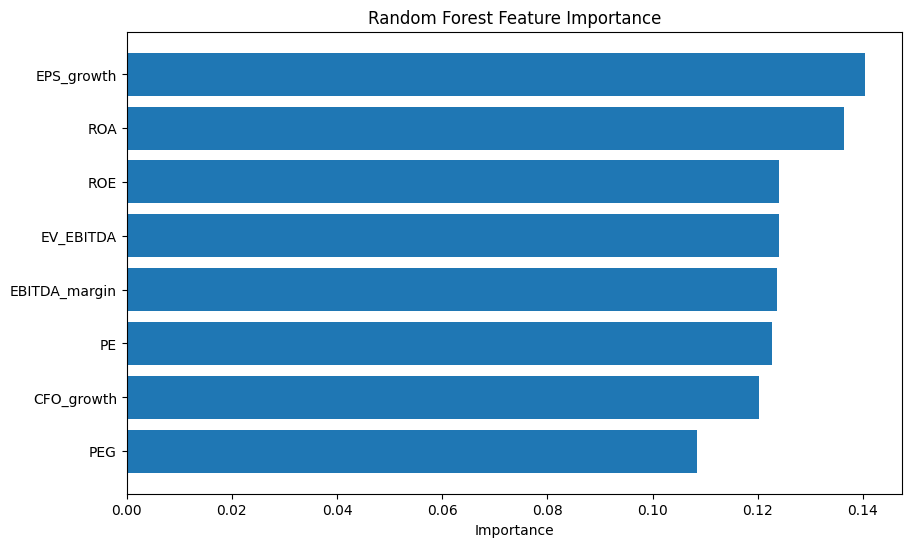

In [210]:
# As the ROC shows the RF model performs the best, we select the RF model as the model for our analysis
importances = rf_model.feature_importances_
feature_names = X_train.columns 

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.show()


# For Live Monthly Workflow

When new data becomes available after the last trading day of each month, firstly clean and reshape the newly collected data:

In [211]:
import pandas as pd
from functools import reduce

# Load the Excel file
xls = pd.ExcelFile("Stock_Screening_CFG_live.xlsx")

# Define sheet-to-feature name mapping
sheet_map = {
    "EVEBITDA": "EV_EBITDA",
    "PE": "PE",                
    "PEG": "PEG",              
    "ROA": "ROA",
    "ROE": "ROE",
    "EBITDAMagin": "EBITDA_margin",
    "EPSGrowth": "EPS_growth",
    "CFO1yrGrowth": "CFO_growth"
}

# Clean and reshape each sheet
feature_dfs = {}
for sheet, name in sheet_map.items():
    df = xls.parse(sheet, index_col=0)
    df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0).astype(float)
    feature_dfs[name] = df

# Convert wide to long format
long_dfs = []
for feature_name, df in feature_dfs.items():
    long_df = df.reset_index().melt(id_vars='Date', var_name='Ticker', value_name=feature_name)
    long_dfs.append(long_df)

# Merge all features into one long DataFrame
merged_df = reduce(lambda left, right: pd.merge(left, right, on=['Date', 'Ticker']), long_dfs)
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Filter for most recent data (e.g., Aug 2024 to latest available)
start_date = pd.to_datetime("2024-08-01")
latest_features = merged_df[merged_df['Date'] >= start_date]

# Save if needed
latest_features.to_excel("Cleaned_Features_Latest.xlsx", index=False)


C:\Users\weish\AppData\Local\Temp\ipykernel_14916\3276181218.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0).astype(float)
C:\Users\weish\AppData\Local\Temp\ipykernel_14916\3276181218.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0).astype(float)
C:\Users\weish\AppData\Local\Temp\ipykernel_14916\3276181218.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0).astype(float)
C:\Users\weish\AppData\Local\Temp\ipykernel_14916\3276181218.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0).astype(float)
C:\Users\weish\AppData\Local\Temp\ipykernel_1491

The cleaned data is then saved in an excel file 'Cleaned_Features_Latest.xlsx' ready for the prediction.

In [213]:
# === Load cleaned feature data ===
df = pd.read_excel("Cleaned_Features_Latest.xlsx")
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match training names exactly
rename_map = {
    "EVEBITDA": "EV_EBITDA",
    "PE": "PE",
    "PEG": "PEG",
    "ROA": "ROA",
    "ROE": "ROE",
    "EBITDAMargin": "EBITDA_Margin",
    "EPSGrowth": "EPS_Growth",
    "CFOGrowth": "CFO_growth"
}
df = df.rename(columns=rename_map)

# Add prediction month
df['Prediction_Month'] = df['Date'] + pd.offsets.MonthEnd(1)

# === Load trained model and feature order ===
rf_model = joblib.load("rf_model.pkl")
feature_order = joblib.load("rf_model_features.pkl")  # <- this is key!

# === Reorder columns to match training order ===
X_live = df[feature_order]  # only the features in correct order

# Predict
df['Predicted_Prob'] = rf_model.predict_proba(X_live)[:, 1]

# Top 10 predictions
top10_by_month = df.groupby("Prediction_Month").apply(
    lambda x: x.sort_values("Predicted_Prob", ascending=False).head(10)
).reset_index(drop=True)

# Output
print(top10_by_month[['Prediction_Month', 'Ticker', 'Predicted_Prob']])

   Prediction_Month         Ticker  Predicted_Prob
0        2024-09-30  NasdaqGS:MPWR            0.89
1        2024-09-30       NYSE:YUM            0.65
2        2024-09-30  NasdaqGS:IDXX            0.60
3        2024-09-30        NYSE:MA            0.56
4        2024-09-30   NasdaqGS:DPZ            0.55
..              ...            ...             ...
75       2025-04-30      NYSE:ANET            0.45
76       2025-04-30  NasdaqGS:NVDA            0.43
77       2025-04-30   NasdaqGS:TER            0.42
78       2025-04-30       NYSE:HWM            0.40
79       2025-04-30       NYSE:AZO            0.40

[80 rows x 3 columns]


C:\Users\weish\AppData\Local\Temp\ipykernel_14916\3479875660.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top10_by_month = df.groupby("Prediction_Month").apply(


Save the Top 10 stocks which are likely to outperform the market and save them in a csv file:

In [216]:
top10_by_month.to_csv("Top10_Predictions_M+1.csv", index=False)
